In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [4]:
df=pd.read_csv('test.csv')
print(len(df))

18543


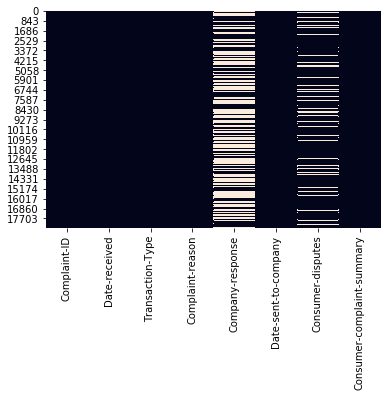

In [5]:
sns.heatmap(df.isnull(), cbar=False)

In [7]:
final_df=df.fillna('the')

In [8]:
final_df = final_df.applymap(str)

In [9]:
final_df.dtypes

Complaint-ID                  object
Date-received                 object
Transaction-Type              object
Complaint-reason              object
Company-response              object
Date-sent-to-company          object
Consumer-disputes             object
Consumer-complaint-summary    object
dtype: object

In [10]:
final_df.columns

Index(['Complaint-ID', 'Date-received', 'Transaction-Type', 'Complaint-reason',
       'Company-response', 'Date-sent-to-company', 'Consumer-disputes',
       'Consumer-complaint-summary'],
      dtype='object')

In [11]:
final_df['new'] = final_df[[ 'Date-received', 'Transaction-Type', 'Complaint-reason','Company-response', 'Date-sent-to-company', 'Consumer-disputes', 'Consumer-complaint-summary']].apply(lambda x: ' '.join(x), axis=1)

In [12]:
final_df['new'].head()

0    8/18/2016 Bank account or service Account open...
1    4/18/2016 Debt collection Communication tactic...
2    3/23/2016 Credit reporting Incorrect informati...
3    6/26/2017 Student loan Dealing with your lende...
4    5/13/2016 Credit reporting Incorrect informati...
Name: new, dtype: object

In [13]:
from nltk.corpus import stopwords
STOPWORDS = list(stopwords.words('english')) + list(stopwords.words('spanish')) + list(stopwords.words('french'))


In [14]:
import re
import string
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

def text_prepare(row):

    text=row['new']
    # 1. Lowercase text
    text = text.lower() 
    # 2. Replace '/', '()', '{}', '[]', '|', '@', ',', ';' by space
    text = REPLACE_BY_SPACE_RE.sub(' ',text)
    # 4. Delete stopwords
    text_words = text.split()
    text_words = [t for t in text_words if t not in STOPWORDS]
    text = ' '.join(text_words)
    return text

In [15]:
final_df['new'] = final_df.apply (lambda row: text_prepare(row),axis=1)

In [16]:
final_df=final_df[['Complaint-ID','new']]

In [17]:
final_df.to_csv('Updated_test.csv', sep=',')